In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

(60000, 28, 28) (10000, 28, 28)


In [3]:
# w, b 초기화
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [4]:
# he normal 초기화
dense =tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [5]:
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=he_normal)
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [6]:
# 규제
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config() 

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [7]:
# L1 규제
dense = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1')
dense.get_config() 

regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer,activation='relu')

In [8]:
# L2 규제
dense = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2')
dense.get_config() 

{'name': 'dense_6',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': {'class_name': 'L2',
  'config': {'l2': 0.009999999776482582}},
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [9]:
# Dropout (25% 비율 적용/25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)

In [10]:
# 배치 정규화
# Model A : Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
print('model_a',model_a.summary())

# Model B : Dense +BatchNorm+ ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])
print('model_b',model_b.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
model_a None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatt

In [11]:
# leakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [12]:
# Model c : Dense +BatchNorm+ LeakyReLU
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
print('model_c',model_c.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [13]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Model.a : Dense + ReLU
history_a = model_a.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)
# Model.b : Dense + ReLU + BatchNorm
history_b = model_b.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)
# Model.c : Dense + LeakyReLU + BatchNorm
history_c = model_c.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3008 - accuracy: 0.9125 - val_loss: 0.1755 - val_accuracy: 0.9464
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1384 - accuracy: 0.9590 - val_loss: 0.1172 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0973 - accuracy: 0.9710 - val_loss: 0.1092 - val_accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0766 - accuracy: 0.9758 - val_loss: 0.1012 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0637 - accuracy: 0.9794 - val_loss: 0.1003 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9833 - val_loss: 0.0887 - val_accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0939 - val_accuracy:

In [15]:
model_a.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9739


[0.10183388739824295, 0.9739000201225281]

In [16]:
model_b.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9753


[0.08465684205293655, 0.9753000140190125]

In [17]:
model_c.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9741


[0.08299446105957031, 0.9740999937057495]

In [18]:
import matplotlib.pyplot as plt
import numpy as np

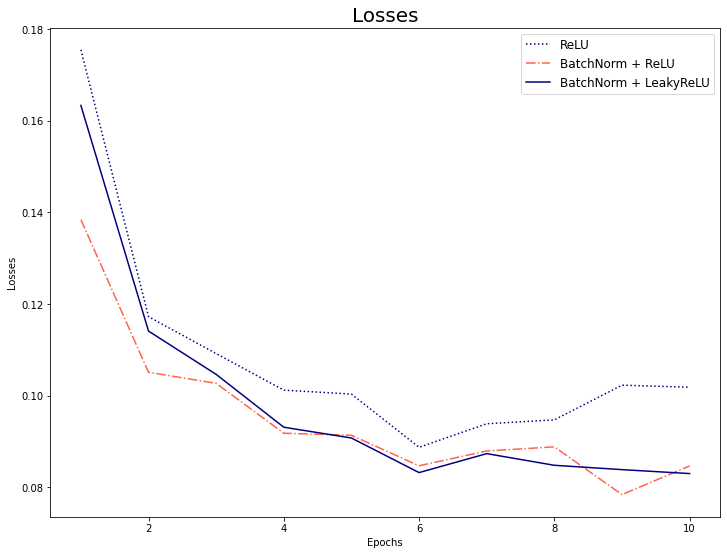

In [19]:
plt.figure(figsize=(12,9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'],color='navy', linestyle = ':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'],color='tomato', linestyle = '-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'],color='navy', linestyle = '-')
plt.title('Losses',fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm + ReLU','BatchNorm + LeakyReLU'],fontsize=12)
plt.show()